In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.style.use('ggplot')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/insurance/insurance.csv


In [2]:
insurance = pd.read_csv('/kaggle/input/insurance/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


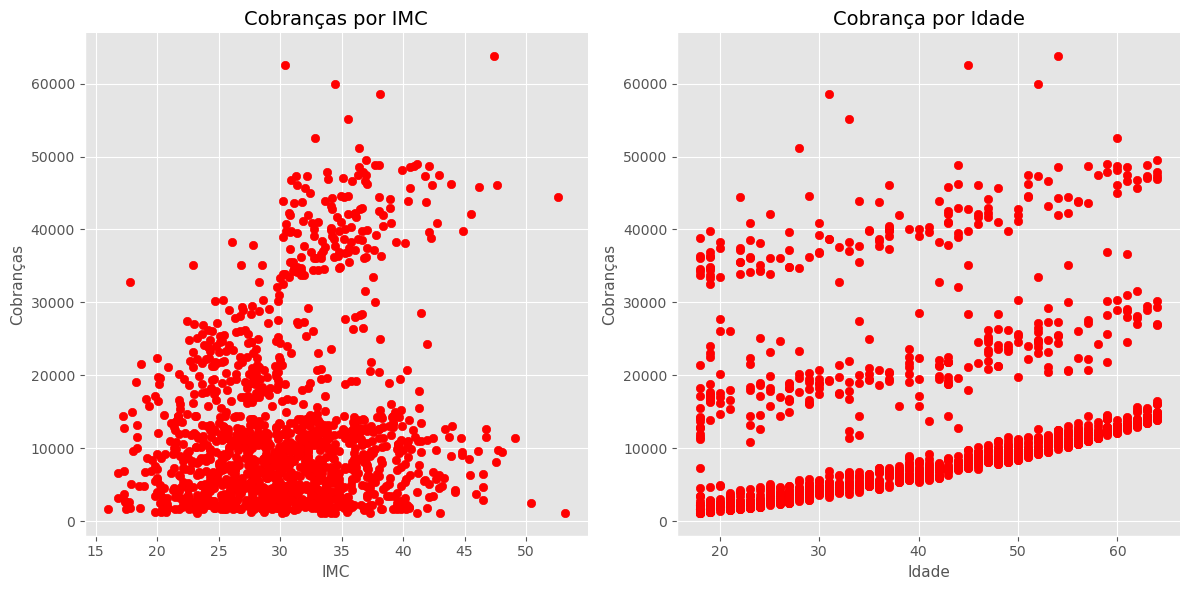

In [3]:
fig, axes = plt.subplots(
    1,
    2,
    figsize=(12, 6)
)

axes[0].scatter(
    data=insurance,
    x='bmi', 
    y='charges',
    color='red'
)

axes[0].set_xlabel('IMC', fontsize=11)
axes[0].set_ylabel('Cobranças', fontsize=11)
axes[0].set_title('Cobranças por IMC', fontsize=14)

axes[1].scatter(
    data=insurance,
    x='age',
    y='charges',
    color='red'
)
axes[1].set_xlabel('Idade', fontsize=11)
axes[1].set_ylabel('Cobranças', fontsize=11)
axes[1].set_title('Cobrança por Idade', fontsize=14)

plt.tight_layout()

plt.show()

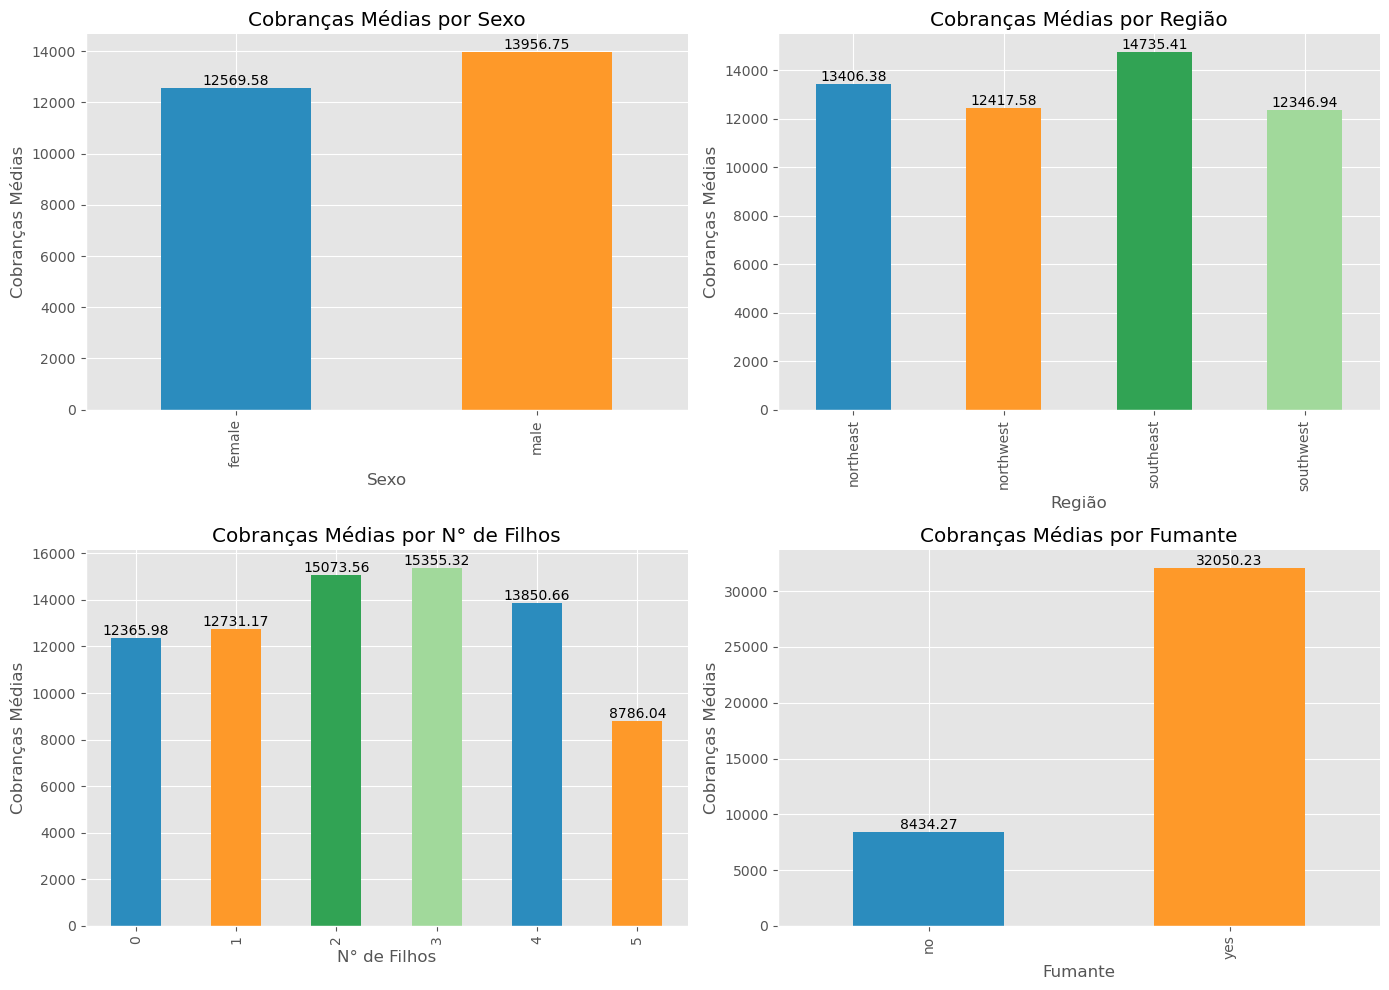

In [4]:
mean_charges_sex = insurance.groupby('sex')['charges'].mean()

mean_charges_region = insurance.groupby('region')['charges'].mean()

mean_charges_children = insurance.groupby('children')['charges'].mean()

mean_charges_smoker = insurance.groupby('smoker')['charges'].mean()

colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

mean_charges_sex.plot(kind='bar', ax=axes[0, 0], color=colors)
axes[0, 0].set_xlabel('Sexo')
axes[0, 0].set_ylabel('Cobranças Médias')
axes[0, 0].set_title('Cobranças Médias por Sexo')

mean_charges_region.plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_xlabel('Região')
axes[0, 1].set_ylabel('Cobranças Médias')
axes[0, 1].set_title('Cobranças Médias por Região')

mean_charges_children.plot(kind='bar', ax=axes[1, 0], color=colors)
axes[1, 0].set_xlabel('N° de Filhos')
axes[1, 0].set_ylabel('Cobranças Médias')
axes[1, 0].set_title('Cobranças Médias por N° de Filhos')

mean_charges_smoker.plot(kind='bar', ax=axes[1, 1], color=colors)
axes[1, 1].set_xlabel('Fumante')
axes[1, 1].set_ylabel('Cobranças Médias')
axes[1, 1].set_title('Cobranças Médias por Fumante')

for i, v in enumerate(mean_charges_sex.values):
    axes[0, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

for i, v in enumerate(mean_charges_region.values):
    axes[0, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

for i, v in enumerate(mean_charges_children.values):
    axes[1, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

for i, v in enumerate(mean_charges_smoker.values):
    axes[1, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

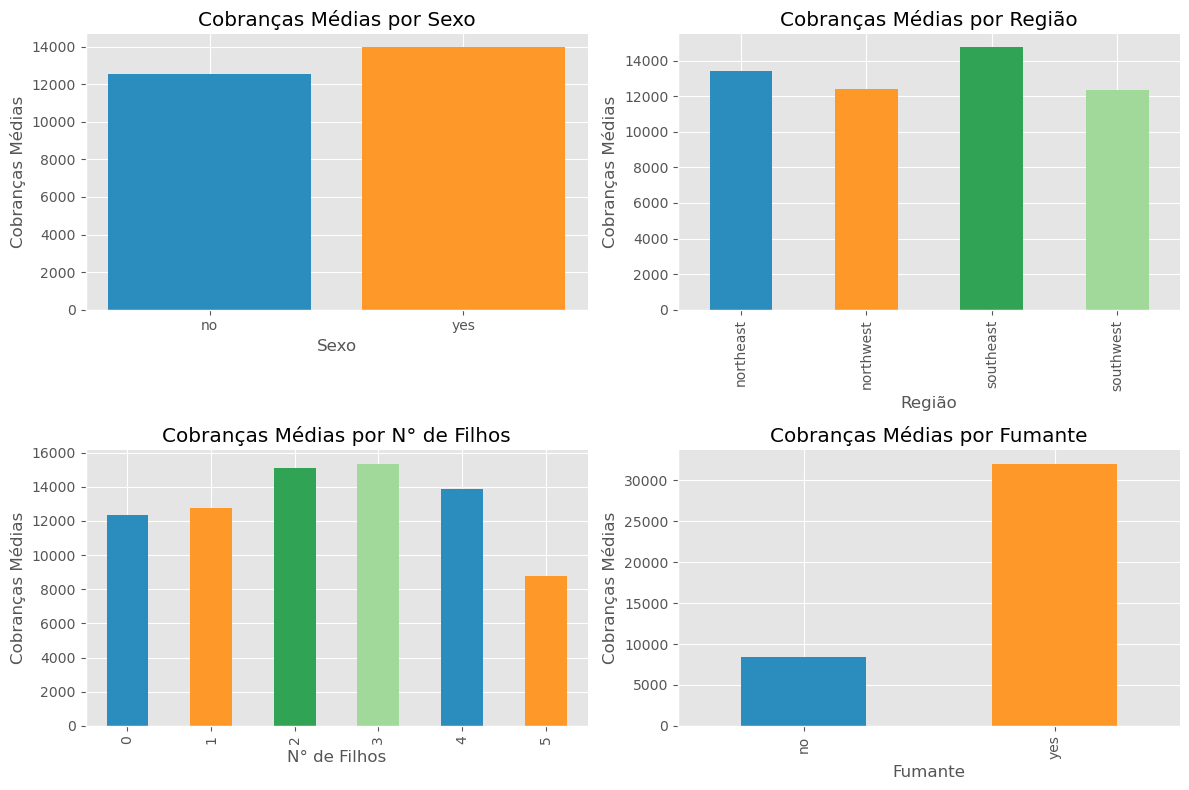

In [5]:
sex_counts = insurance['sex'].value_counts()
region_counts = insurance['region'].value_counts()
sex_counts = insurance['children'].value_counts()
sex_counts = insurance['smoker'].value_counts()

colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].bar(
    sex_counts.index, 
    insurance.groupby('sex')['charges'].mean(),
    color=colors
)
axes[0, 0].set_xlabel('Sexo')
axes[0, 0].set_ylabel('Cobranças Médias')
axes[0, 0].set_title('Cobranças Médias por Sexo')

mean_charges_region.plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_xlabel('Região')
axes[0, 1].set_ylabel('Cobranças Médias')
axes[0, 1].set_title('Cobranças Médias por Região')

mean_charges_children.plot(kind='bar', ax=axes[1, 0], color=colors)
axes[1, 0].set_xlabel('N° de Filhos')
axes[1, 0].set_ylabel('Cobranças Médias')
axes[1, 0].set_title('Cobranças Médias por N° de Filhos')

mean_charges_smoker.plot(kind='bar', ax=axes[1, 1], color=colors)
axes[1, 1].set_xlabel('Fumante')
axes[1, 1].set_ylabel('Cobranças Médias')
axes[1, 1].set_title('Cobranças Médias por Fumante')

plt.tight_layout()
plt.show()

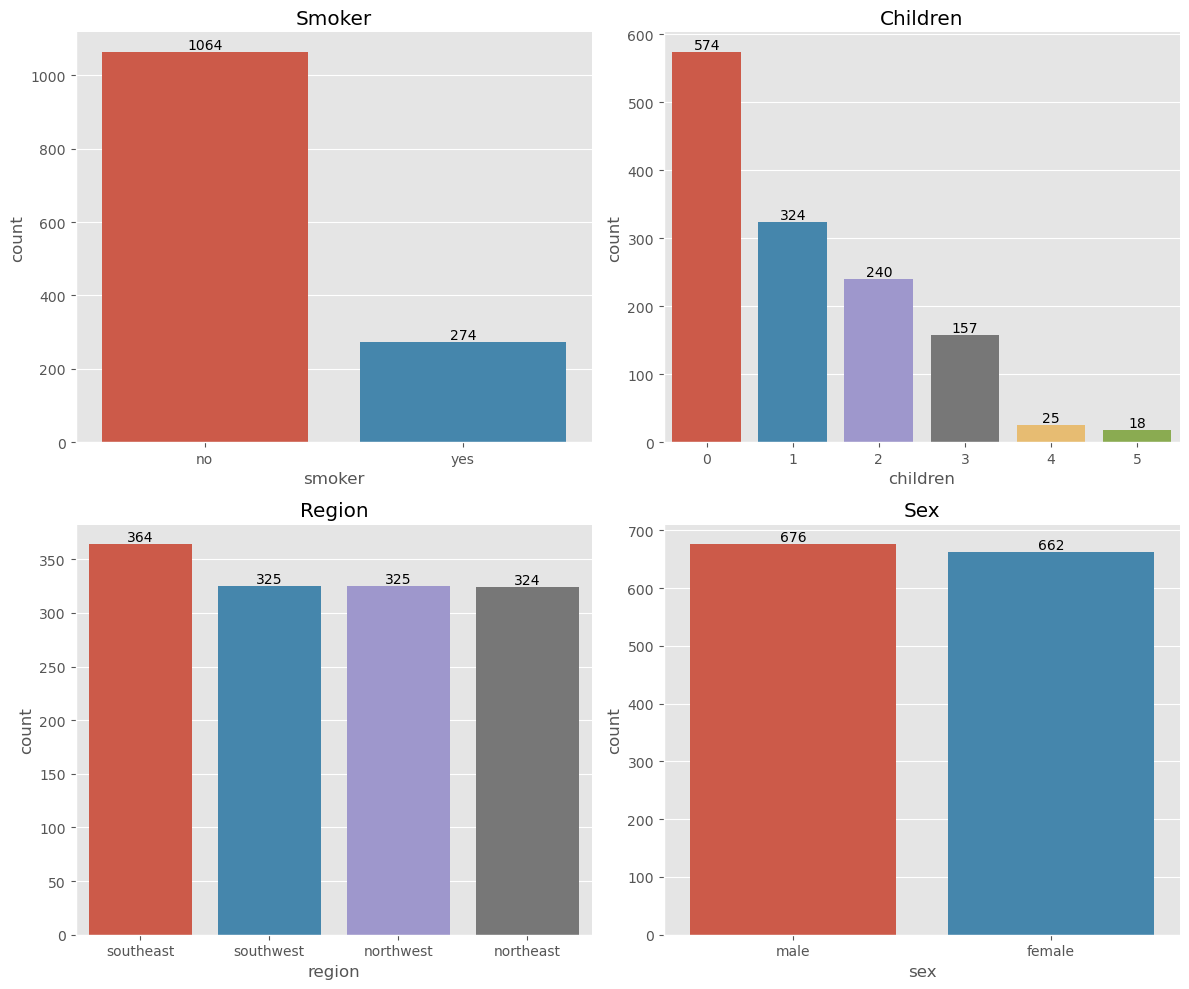

In [6]:
fix, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data=insurance, x='smoker', ax=axes[0, 0], order=insurance['smoker'].value_counts().index)
axes[0, 0].set_title('Smoker')

sns.countplot(data=insurance, x='children', ax=axes[0, 1], order=insurance['children'].value_counts().index)
axes[0, 1].set_title('Children')

sns.countplot(data=insurance, x='region', ax=axes[1, 0], order=insurance['region'].value_counts().index)
axes[1, 0].set_title('Region')

sns.countplot(data=insurance, x='sex', ax=axes[1, 1], order=insurance['sex'].value_counts().index)
axes[1, 1].set_title('Sex')

for i, v in enumerate(insurance['smoker'].value_counts().values):
    axes[0, 0].text(i, v, str(v), ha='center', va='bottom')

for i, v in enumerate(insurance['children'].value_counts().values):
    axes[0, 1].text(i, v, str(v), ha='center', va='bottom')

for i, v in enumerate(insurance['region'].value_counts().values):
    axes[1, 0].text(i, v, str(v), ha='center', va='bottom')
    
for i, v in enumerate(insurance['sex'].value_counts().values):
    axes[1, 1].text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**TODO** Tutorial explicando funcionalidades do Matplotlib e do Seaborn

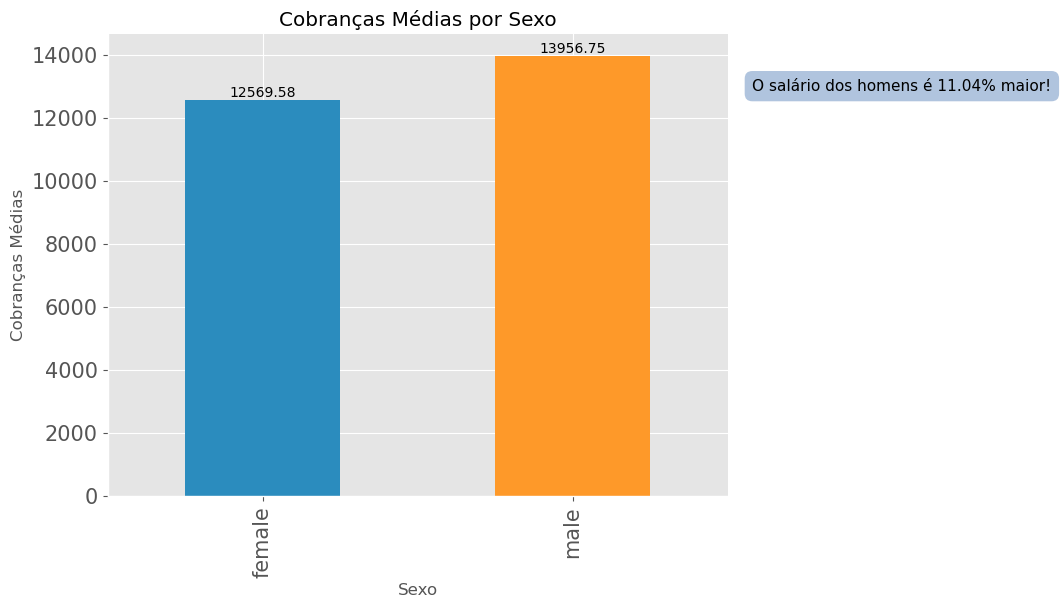

In [7]:
mean_charges_sex = insurance.groupby('sex')['charges'].mean()

colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

fig, axes = plt.subplots(figsize=(8, 6))

mean_charges_sex.plot(kind='bar', ax=axes, color=colors, fontsize=15)
axes.set_xlabel('Sexo')
axes.set_ylabel('Cobranças Médias')
axes.set_title('Cobranças Médias por Sexo')

for i, v in enumerate(mean_charges_sex.values):
    axes.text(i, v, f'{v:.2f}', ha='center', va='bottom')

diff_percent = (mean_charges_sex['male'] - mean_charges_sex['female']) / mean_charges_sex['female'] * 100    

axes.text(
    1.58,
    mean_charges_sex.values[1]-1100,
    f'O salário dos homens é {diff_percent:.2f}% maior!',
    bbox={'facecolor': 'lightsteelblue',
        'alpha': 1,
        'pad': 0.5,
        'edgecolor': 'none',
        'boxstyle': 'round'},
    color='black',
    fontsize=11
)

plt.show()